# Lecture 8 - Binary Dependent Variable

### Boston HMDA data set

The Boston HMDA data set was collected by researchers at the Federal Reserve Bank of Boston. The data pertain to mortgage applications made in 1990 in the greater Boston metropolitan area.

The dataset is used in the reference textbook Introduction to Econometrics, 4th edition 
(Stock and Watson).

First load the data set from the file <b>hmda_sw.csv</b> and import libraries

In [1]:
# Importing useful libraries and loading data set

import numpy as np
import pandas as pd
import pandas.plotting as pp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
df = pd.read_csv("hmda_sw.csv")

In [3]:
df

,Unnamed: 0,deny,pirat,hirat,lvrat,chist,mhist,phist,unemp,selfemp,insurance,condomin,afam,single,hschool
0,1,no,0.221,0.221,0.800000,5,2,no,3.9,no,no,no,no,no,yes
1,2,no,0.265,0.265,0.921875,2,2,no,3.2,no,no,no,no,yes,yes
2,3,no,0.372,0.248,0.920398,1,2,no,3.2,no,no,no,no,no,yes
3,4,no,0.320,0.250,0.860465,1,2,no,4.3,no,no,no,no,no,yes
4,5,no,0.360,0.350,0.600000,1,1,no,3.2,no,no,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,2376,no,0.310,0.250,0.800000,1,1,no,3.2,yes,no,no,no,no,yes
2376,2377,no,0.300,0.300,0.777049,1,2,no,3.2,no,no,yes,no,yes,yes
2377,2378,no,0.260,0.200,0.526761,2,1,no,3.1,no,no,no,no,no,yes
2378,2379,yes,0.320,0.260,0.753846,6,1,yes,3.1,no,no,yes,yes,yes,yes


## Linear Probability Model

The variable <b>deny</b> has values "yes" and "no" to determine whether the mortgage application was denied.

To run a linear probability model we must transform this variable in a dummy variable using the <b>get_dummies</b> function from the library pandas.

The new variable <b>deny_yes</b> takes the value of 1 if the applicant had his mortgage application denied and 0 otherwise.

Also, the variable <b>afam_yes</b> takes the value of 1 if the applicant had is African American and 0 otherwise.

In [4]:
df = pd.get_dummies(df, columns = ['deny','afam'], dtype=int)

In [5]:
df

,Unnamed: 0,pirat,hirat,lvrat,chist,mhist,phist,unemp,selfemp,insurance,condomin,single,hschool,deny_no,deny_yes,afam_no,afam_yes
0,1,0.221,0.221,0.800000,5,2,no,3.9,no,no,no,no,yes,1,0,1,0
1,2,0.265,0.265,0.921875,2,2,no,3.2,no,no,no,yes,yes,1,0,1,0
2,3,0.372,0.248,0.920398,1,2,no,3.2,no,no,no,no,yes,1,0,1,0
3,4,0.320,0.250,0.860465,1,2,no,4.3,no,no,no,no,yes,1,0,1,0
4,5,0.360,0.350,0.600000,1,1,no,3.2,no,no,no,no,yes,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,2376,0.310,0.250,0.800000,1,1,no,3.2,yes,no,no,no,yes,1,0,1,0
2376,2377,0.300,0.300,0.777049,1,2,no,3.2,no,no,yes,yes,yes,1,0,1,0
2377,2378,0.260,0.200,0.526761,2,1,no,3.1,no,no,no,no,yes,1,0,1,0
2378,2379,0.320,0.260,0.753846,6,1,yes,3.1,no,no,yes,yes,yes,0,1,0,1


In [6]:
formula = 'deny_yes ~ pirat'

model = smf.ols(formula, df).fit(cov_type='HC0')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               deny_yes   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     37.59
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           1.02e-09
Time:                        08:51:26   Log-Likelihood:                -651.42
No. Observations:                2380   AIC:                             1307.
Df Residuals:                    2378   BIC:                             1318.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0799      0.032     -2.501      0.0

<AxesSubplot:xlabel='pirat', ylabel='deny_yes'>

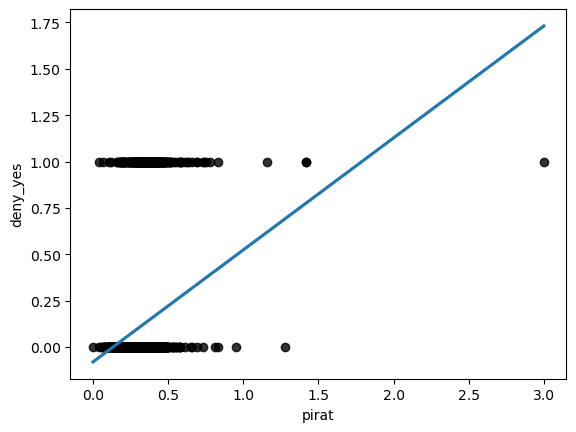

In [7]:
#define the dependent and independent variables

X = df.pirat
Y = df.deny_yes

#plot Linear regression curve
sns.regplot(x=X, y=Y, data=df, scatter_kws={'color': 'black'}, ci=None)

In [8]:
formula2 = 'deny_yes ~ pirat + afam_yes'

model2 = smf.ols(formula2, df).fit(cov_type='HC0')
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               deny_yes   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     49.45
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           9.11e-22
Time:                        08:51:32   Log-Likelihood:                -605.61
No. Observations:                2380   AIC:                             1217.
Df Residuals:                    2377   BIC:                             1235.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0905      0.029     -3.167      0.0

## Logistic Regression

In [9]:
logistic_model = smf.logit(formula, df).fit(cov_type='HC0')
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.348779
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               deny_yes   No. Observations:                 2380
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                 0.04815
Time:                        08:51:35   Log-Likelihood:                -830.09
converged:                       True   LL-Null:                       -872.09
Covariance Type:                  HC0   LLR p-value:                 4.992e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0284      0.359    -11.227      0.000      -4.732      -3.325
pirat          5.8845      1.

<AxesSubplot:xlabel='pirat', ylabel='deny_yes'>

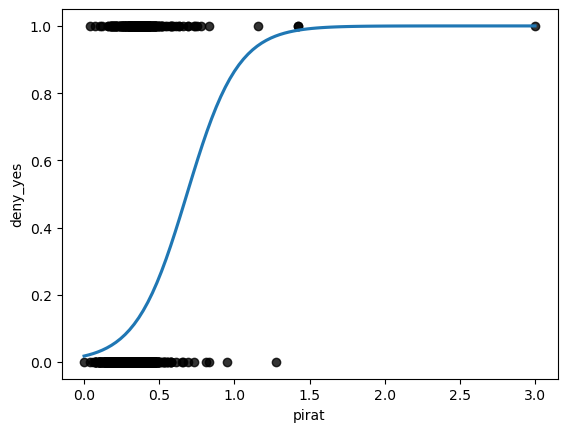

In [10]:
#Plot Logistic regression curve
sns.regplot(x=X, y=Y, data=df, logistic=True, scatter_kws={'color': 'black'}, ci=None)

In [11]:
logistic_model2 = smf.logit(formula2, df).fit(cov_type='HC0')
print(logistic_model2.summary())

Optimization terminated successfully.
         Current function value: 0.334326
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               deny_yes   No. Observations:                 2380
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                 0.08759
Time:                        08:51:39   Log-Likelihood:                -795.70
converged:                       True   LL-Null:                       -872.09
Covariance Type:                  HC0   LLR p-value:                 6.671e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1256      0.346    -11.932      0.000      -4.803      -3.448
pirat          5.3704      0.